In [1]:
import numpy as np
import scipy
from scipy import special
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
plt.style.use('seaborn-pastel')

<IPython.core.display.Javascript object>


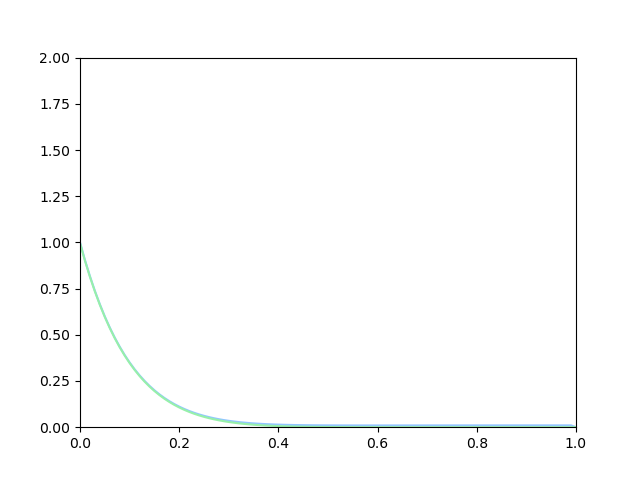

In [3]:
#решение для нелинейной задачи,численное и теоретическое
lambd_0 = 0.1
sigm = 0.1
Temp=1
L = 1
T = 1
C_p = 0.2
m = 100
h = L / m
t = C_p * h ** 2 / (lambd_0 * Temp**sigm)
n = int(T // t)
q = t / (h)**2
eps = 0.01
c = np.sqrt(Temp ** (sigm)*lambd_0 / sigm)
x_i = np.arange(0, L+h, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i
#граничные условия
g_t_h[0] = eps
for j in range(1, n):
    g_t_h[j][0] = Temp * (t_j[j]) ** (1/sigm)
    
for j in range(r_j - 1):#время
    for i in range(1, r_i - 1): #пространство
        lambd_i_1 = lambd_0 * (g_t_h[j][i - 1])**sigm
        lambd_i = lambd_0 * (g_t_h[j][i])**sigm
        lambd_i1 = lambd_0 * (g_t_h[j][i+1])**sigm
        lambd_plus = 2 * (lambd_i * lambd_i1) / (lambd_i + lambd_i1)
        lambd_minus = 2 * (lambd_i*lambd_i_1) / (lambd_i + lambd_i_1)
        g_t_h[j+1][i] = (g_t_h[j][i] * (1 - q *(lambd_minus + lambd_plus)) + g_t_h[j][i+1] * q * lambd_plus + g_t_h[j][i-1] * lambd_minus*q)

def right_decision(x, t):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] <= c * t:
            ans[i] = (sigm * c * (c * t - x[i]) / lambd_0) ** (1 / sigm)
        else:
            ans[i] = 0
    return ans
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 2))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    x_i = np.arange(0, L+h, h)
    y2 = right_decision(x_i, i * t)
    y1 = g_t_h[i]
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=n, interval=1, blit=True, repeat = False)     
#зеленое - теоретическое, синее - численное        